# Feature Scaling


## Data collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataser
df = pd.read_csv('../Datasets/Social_Network_Ads.csv')

In [3]:
# keeping the necessary columns only i.e. from column 2 to last
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
272,60,42000,1
204,58,101000,1
4,19,76000,0
149,20,74000,0
186,20,82000,0


In [5]:
df.shape

(400, 3)

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# dividing the dataset into input and output
X = df.iloc[:,0:2] # input columns
y = df.iloc[:,-1] # output column

In [8]:
#dividing the dataset into training(70%) and testing(30%) data.
# random_state is used so that whenever the code in run, you get the same split of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [11]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [12]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

## Standardized Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
# Fit means you make it remember the parameters -> You always fit on training set
scaler.fit(X_train)

#transform is where ur values are scaled using z-score normalisation -> You always transfrom both training and test sets.
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

#NOTE: when you apply transform on a DataFrame, it converts it into a numpy array

In [16]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [18]:
X_train_scaled.sample(5)

,Age,EstimatedSalary
120,1.189783,-1.440375
43,0.307425,0.497201
226,1.581942,1.104501
99,0.993704,-1.006589
178,-0.771013,-1.584970


In [19]:
X_test_scaled.sample(5)

,Age,EstimatedSalary
42,-1.065133,0.410444
68,0.209385,-0.659561
49,1.091743,0.468282
15,-0.574933,1.364772
90,0.405465,-0.167937


In [20]:
#you can see after scaling mean = 0, sd = 1
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

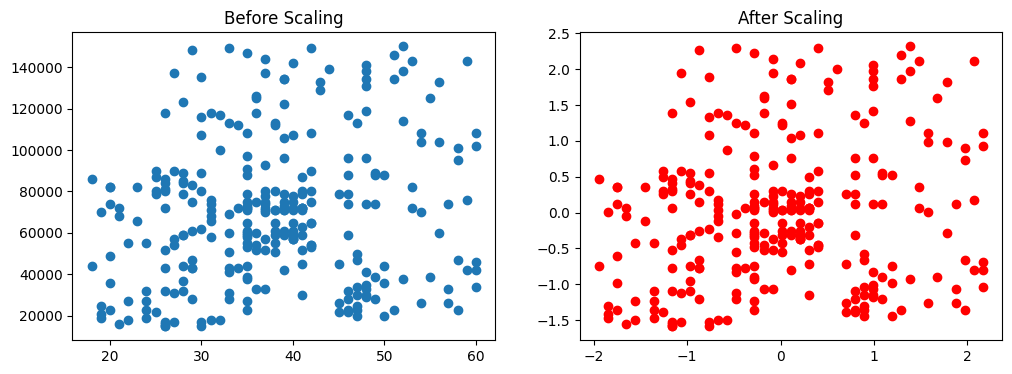

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,4))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After Scaling')

plt.show()

- You can see the structure of the data is not affected due to scaling

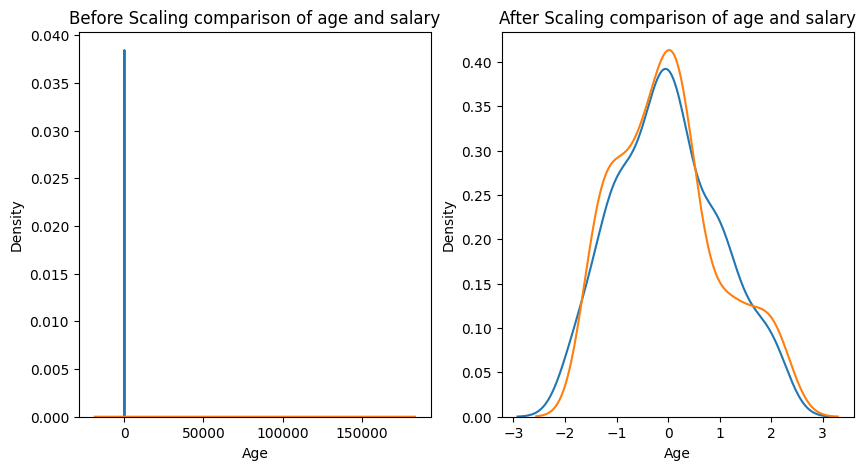

In [22]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize = (10, 5))
ax1.set_title('Before Scaling comparison of age and salary')
sns.kdeplot(X_train['Age'],ax =ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax =ax1)

ax2.set_title('After Scaling comparison of age and salary')
sns.kdeplot(X_train_scaled['Age'],ax =ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax =ax2)

plt.show()



- You can see after scaling both variables become comparable

## Effect of scaling on variables individually

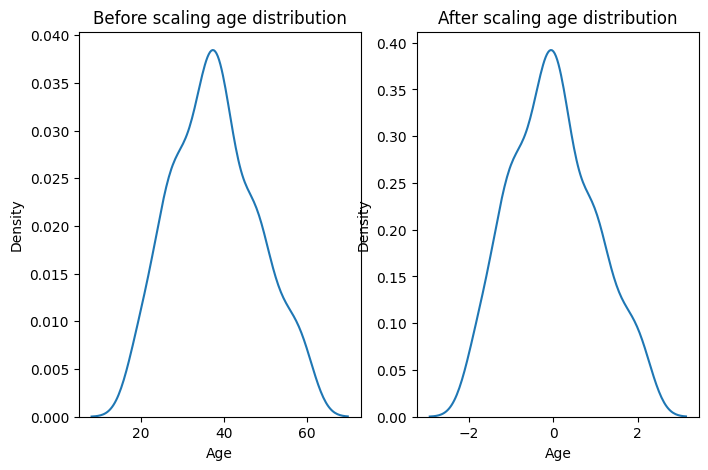

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (8,5))
ax1.set_title('Before scaling age distribution')
sns.kdeplot(X_train['Age'],ax= ax1)
ax2.set_title('After scaling age distribution')
sns.kdeplot(X_train_scaled['Age'],ax= ax2)
plt.show()


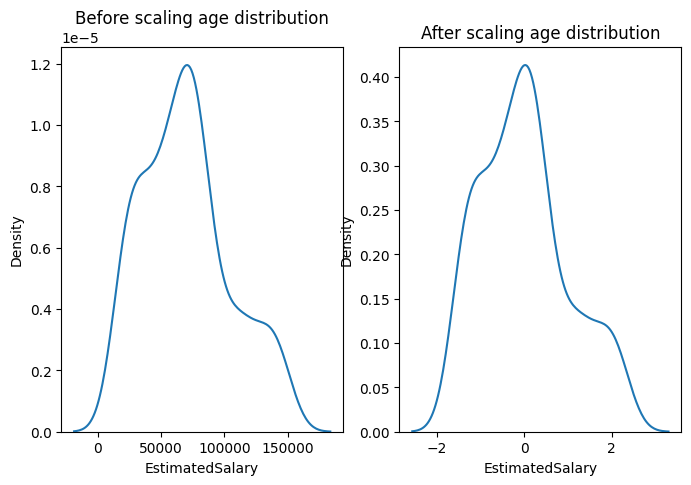

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (8,5))
ax1.set_title('Before scaling age distribution')
sns.kdeplot(X_train['EstimatedSalary'],ax= ax1)
ax2.set_title('After scaling age distribution')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax= ax2)
plt.show()

- You can see scaling didn't affect the variables individually.
- Their distribution remains the same

# Why scaling is important
 - Because it increases the accuracy of the algorithms.

# Effect of scaling on outliers 

In [25]:
np.round(df.describe(),1)

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


In [26]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)

In [27]:
# dividing the dataset into input and output
X = df.iloc[:,0:2] # input columns
y = df.iloc[:,-1] # output column̨

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

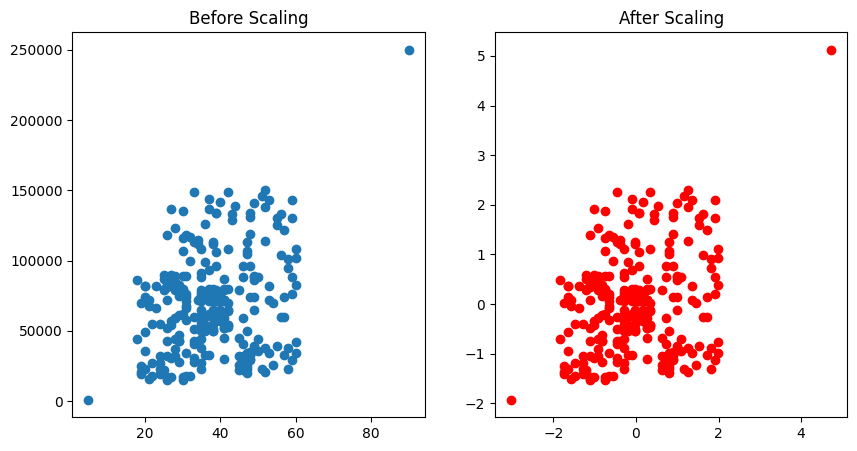

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (10,5))
ax1.set_title('Before Scaling')
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.set_title('After Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
plt.show()

### Conclusion
- The outliers are still present in the data even after scaling
- So, you need to take care of it later